<a href="https://colab.research.google.com/github/kodenshacho/ColaboratoryNotes/blob/main/xraylib_qiita.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# xraylib を google colab 上で動かす


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib.cm as cm
plt.rcParams['font.family'] = 'serif'
parameters = {'axes.labelsize': 15, 'axes.titlesize': 15, 'xtick.labelsize' : 14, 'ytick.labelsize' : 14}
plt.rcParams.update(parameters)

from matplotlib.colors import LogNorm
import matplotlib.colors as colors
import gdown # https://github.com/wkentaro/gdown

## condacolab のインストール 
ver 2022.8.4, S.Y. 

In [2]:
# check python path
!which python 
!python --version  # Python 3.7.13 @2022.8.4

/usr/local/bin/python
Python 3.8.16


In [7]:
# install condacolab
!pip install -q condacolab

In [4]:
import condacolab
condacolab.install() # Mambaforge-colab-Linux-x86_64.sh...  @2022.8.4

⏬ Downloading https://github.com/jaimergp/miniforge/releases/latest/download/Mambaforge-colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:21
🔁 Restarting kernel...


In [5]:
# check conda version 
!conda --version

conda 22.9.0


In [3]:
# check path 
!which conda

/usr/local/bin/conda


In [4]:
# check python path
!which python
!python --version # Python 3.7.10 @2022.8.4

/usr/local/bin/python
Python 3.8.15


In [8]:
# check conda envirionment 
!conda info -e 

# conda environments:
#
base                     /usr/local



## xraylib の install 
conda から install する。

In [9]:
!conda install -y -c conda-forge xraylib

Solving environment: - \ | / - \ | / - \ | / - \ | / - \ | / done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - xraylib


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2022.12.7  |       ha878542_0         143 KB  conda-forge
    certifi-2022.12.7          |     pyhd8ed1ab_0         147 KB  conda-forge
    colorama-0.4.6             |     pyhd8ed1ab_0          25 KB  conda-forge
    conda-22.11.1              |   py38h578d9bd_1         905 KB  conda-forge
    libblas-3.9.0              |16_linux64_openblas          13 KB  conda-forge
    libcblas-3.9.0             |16_linux64_openblas          13 KB  conda-forge
    libgfortran-ng-12.2.0      |      h69a702a_19          22 KB  conda-forge
    libgfortran5-12.2.0        |      h337968e_19         1.8 MB  conda-forge
    liblapack-3.9.0     

## xraylib の example を動かす。
ソースーコード : https://github.com/tschoonj/xraylib/blob/master/example/xrlexample5.py 

In [10]:
import xraylib
import math
import numpy as np

xraylib.XRayInit()
print("Example of python program using xraylib")
print("xraylib version: {}".format(xraylib.__version__))
print("Density of pure Al : {} g/cm3".format(xraylib.ElementDensity(13)))
print("Ca K-alpha Fluorescence Line Energy: {}".format(xraylib.LineEnergy(20, xraylib.KA_LINE)))
print("Fe partial photoionization cs of L3 at 6.0 keV: {}".format(xraylib.CS_Photo_Partial(26, xraylib.L3_SHELL,6.0)))
print("Zr L1 edge energy: {}".format(xraylib.EdgeEnergy(40, xraylib.L1_SHELL)))
print("Pb Lalpha XRF production cs at 20.0 keV (jump approx): {}".format(xraylib.CS_FluorLine(82, xraylib.LA_LINE,20.0)))
print("Pb Lalpha XRF production cs at 20.0 keV (Kissel): {}".format(xraylib.CS_FluorLine_Kissel(82, xraylib.LA_LINE,20.0)))
print("Bi M1N2 radiative rate: {}".format(xraylib.RadRate(83, xraylib.M1N2_LINE)))
print("U M3O3 Fluorescence Line Energy: {}".format(xraylib.LineEnergy(92, xraylib.M3O3_LINE)))
print("Ca(HCO3)2 Rayleigh cs at 10.0 keV: {}".format(xraylib.CS_Rayl_CP("Ca(HCO3)2",10.0)))

Example of python program using xraylib
xraylib version: 4.1.3
Density of pure Al : 2.6989 g/cm3
Ca K-alpha Fluorescence Line Energy: 3.6904905714961105
Fe partial photoionization cs of L3 at 6.0 keV: 22.444635592574553
Zr L1 edge energy: 2.5316
Pb Lalpha XRF production cs at 20.0 keV (jump approx): 11.414356266865491
Pb Lalpha XRF production cs at 20.0 keV (Kissel): 11.181532140402364
Bi M1N2 radiative rate: 0.53915
U M3O3 Fluorescence Line Energy: 4.11
Ca(HCO3)2 Rayleigh cs at 10.0 keV: 0.39754478321999853


In [ ]:
cdtest = xraylib.CompoundParser("Ca(HCO3)2")
print("Ca(HCO3)2 contains {} atoms, {} elements and has a molar mass of {} g/mol".format(cdtest['nAtomsAll'], cdtest['nElements'], cdtest['molarMass']))
for i in range(cdtest['nElements']):
    print("Element {}: {} % and {} atoms".format(cdtest['Elements'][i], cdtest['massFractions'][i]*100.0, cdtest['nAtoms'][i]))

cdtest = xraylib.CompoundParser("SiO2")
print("SiO2 contains {} atoms, {} elements and has a molar mass of {} g/mol".format(cdtest['nAtomsAll'], cdtest['nElements'], cdtest['molarMass']))
for i in range(cdtest['nElements']):
    print("Element {}: {} % and {} atoms".format(cdtest['Elements'][i], cdtest['massFractions'][i]*100.0, cdtest['nAtoms'][i]))

In [ ]:
print("CS2 Refractive Index at 10.0 keV : {} - {} i".format(xraylib.Refractive_Index_Re("CS2",10.0,1.261), xraylib.Refractive_Index_Im("CS2",10.0,1.261)))
print("C16H14O3 Refractive Index at 1 keV : {} - {} i".format(xraylib.Refractive_Index_Re("C16H14O3",1.0,1.2), xraylib.Refractive_Index_Im("C16H14O3",1.0,1.2)))
print("SiO2 Refractive Index at 5 keV : {} - {} i".format(xraylib.Refractive_Index_Re("SiO2",5.0,2.65), xraylib.Refractive_Index_Im("SiO2",5.0,2.65)))
print("Compton profile for Fe at pz = 1.1 : {}".format(xraylib.ComptonProfile(26,1.1)))
print("M5 Compton profile for Fe at pz = 1.1 : {}".format(xraylib.ComptonProfile_Partial(26, xraylib.M5_SHELL,1.1)))
print("M1->M5 Coster-Kronig transition probability for Au : {}".format(xraylib.CosKronTransProb(79, xraylib.FM15_TRANS)))
print("L1->L3 Coster-Kronig transition probability for Fe : {}".format(xraylib.CosKronTransProb(26, xraylib.FL13_TRANS)))
print("Au Ma1 XRF production cs at 10.0 keV (Kissel): {}".format(xraylib.CS_FluorLine_Kissel(79, xraylib.MA1_LINE,10.0)))
print("Au Mb XRF production cs at 10.0 keV (Kissel): {}".format(xraylib.CS_FluorLine_Kissel(79, xraylib.MB_LINE,10.0)))
print("Au Mg XRF production cs at 10.0 keV (Kissel): {}".format(xraylib.CS_FluorLine_Kissel(79, xraylib.MG_LINE,10.0)))
print("K atomic level width for Fe: {}".format(xraylib.AtomicLevelWidth(26, xraylib.K_SHELL)))
print("Bi L2-M5M5 Auger non-radiative rate: {}".format(xraylib.AugerRate(86, xraylib.L2_M5M5_AUGER)))
print("Bi L3 Auger yield: {}".format(xraylib.AugerYield(86, xraylib.L3_SHELL)))

In [ ]:
print("Sr anomalous scattering factor Fi at 10.0 keV: {}".format(xraylib.Fi(38, 10.0)))
print("Sr anomalous scattering factor Fii at 10.0 keV: {}".format(xraylib.Fii(38, 10.0)))

symbol = xraylib.AtomicNumberToSymbol(26)
print("Symbol of element 26 is: {}".format(symbol))
print("Number of element Fe is: {}".format(xraylib.SymbolToAtomicNumber("Fe")))
Z = np.array([26])
print(Z)
symbol = xraylib.AtomicNumberToSymbol(int(Z[0]))
#symbol = xraylib.AtomicNumberToSymbol(Z[0]) # does not work b/c. numpy.int64 is not accepted.. (probably a bug.)
print("Symbol of element 26 is: {}".format(symbol))
print("Pb Malpha XRF production cs at 20.0 keV with cascade effect: {}".format(xraylib.CS_FluorLine_Kissel(82, xraylib.MA1_LINE,20.0)))
print("Pb Malpha XRF production cs at 20.0 keV with radiative cascade effect: {}".format(xraylib.CS_FluorLine_Kissel_Radiative_Cascade(82, xraylib.MA1_LINE,20.0)))
print("Pb Malpha XRF production cs at 20.0 keV with non-radiative cascade effect: {}".format(xraylib.CS_FluorLine_Kissel_Nonradiative_Cascade(82, xraylib.MA1_LINE,20.0)))
print("Pb Malpha XRF production cs at 20.0 keV without cascade effect: {}".format(xraylib.CS_FluorLine_Kissel_no_Cascade(82, xraylib.MA1_LINE,20.0)))
print("Al mass energy-absorption cs at 20.0 keV: {}".format(xraylib.CS_Energy(13, 20.0)))
print("Pb mass energy-absorption cs at 40.0 keV: {}".format(xraylib.CS_Energy(82, 40.0)))
print("CdTe mass energy-absorption cs at 40.0 keV: {}".format(xraylib.CS_Energy_CP("CdTe", 40.0)))

In [1]:
cryst = xraylib.Crystal_GetCrystal("Si")
if cryst is None:
    raise KeyError('Diamond crystal not found')

print("Si unit cell dimensions are {} {} {}".format(cryst['a'],cryst['b'],cryst['c']))
print("Si unit cell angles are {} {} {}".format(cryst['alpha'],cryst['beta'],cryst['gamma']))
print("Si unit cell volume is {}".format(cryst['volume']))
print("Si atoms at:")
print("   Z  fraction    X        Y        Z")
for i in range(cryst['n_atom']):
    atom =  cryst['atom'][i]
    print("  {} {} {} {} {}".format(atom['Zatom'], atom['fraction'], atom['x'], atom['y'], atom['z']))
print("")


NameError: ignored

In [2]:
print("Si111 at 8 KeV. Incidence at the Bragg angle:")
energy = 8
debye_temp_factor = 1.0
rel_angle = 1.0

bragg = xraylib.Bragg_angle(cryst, energy, 1, 1, 1)
print("  Bragg angle: Rad: {} Deg: {}".format(bragg, bragg*180/math.pi))

q = xraylib.Q_scattering_amplitude(cryst, energy, 1, 1, 1, rel_angle)
print("  Q Scattering amplitude: {}".format(q))

#notice the 3 return values!!!
f0, fp, fpp = xraylib.Atomic_Factors(14, energy, q, debye_temp_factor)
print("  Atomic factors (Z = 14) f0, fp, fpp: {}, {}, i*{}".format(f0, fp, fpp))

FH = xraylib.Crystal_F_H_StructureFactor(cryst, energy, 1, 1, 1, debye_temp_factor, rel_angle)
print("  FH(1,1,1) structure factor: ({}, {})".format(FH.real, FH.imag))

F0 = xraylib.Crystal_F_H_StructureFactor(cryst, energy, 0, 0, 0, debye_temp_factor, rel_angle)
print("  F0=FH(0,0,0) structure factor: ({}, {})".format(F0.real, F0.imag))

# Diamond diffraction parameters
cryst = xraylib.Crystal_GetCrystal("Diamond")
if cryst is None:
    raise KeyError('Diamond crystal not found')

print("")
print("Diamond 111 at 8 KeV. Incidence at the Bragg angle:")
bragg = xraylib.Bragg_angle(cryst, energy, 1, 1, 1)
print("  Bragg angle: Rad: {} Deg: {}".format(bragg, bragg*180/math.pi))

q = xraylib.Q_scattering_amplitude(cryst, energy, 1, 1, 1, rel_angle)
print("  Q Scattering amplitude: {}".format(q))

# notice the 3 return values!!!
f0, fp, fpp = xraylib.Atomic_Factors(6, energy, q, debye_temp_factor)
print("  Atomic factors (Z = 6) f0, fp, fpp: {}, {}, {}".format(f0, fp, fpp))

FH = xraylib.Crystal_F_H_StructureFactor(cryst, energy, 1, 1, 1, debye_temp_factor, rel_angle)
print("  FH(1,1,1) structure factor: ({}, {})".format(FH.real, FH.imag))

F0 = xraylib.Crystal_F_H_StructureFactor(cryst, energy, 0, 0, 0, debye_temp_factor, rel_angle)
print("  F0=FH(0,0,0) structure factor: ({}, {})".format(F0.real, F0.imag))

FHbar = xraylib.Crystal_F_H_StructureFactor(cryst, energy, -1, -1, -1, debye_temp_factor, rel_angle)
dw = 1e10 * 2 * (xraylib.R_E / cryst['volume']) * (xraylib.KEV2ANGST * xraylib.KEV2ANGST/ (energy * energy)) * math.sqrt(abs(FH * FHbar)) / math.pi / math.sin(2*bragg)

print("  Darwin width: {} micro-radians".format(1.0E6*dw))
print("")

# Alpha Quartz diffraction parameters

cryst = xraylib.Crystal_GetCrystal("AlphaQuartz")

print("Alpha Quartz 020 at 8 KeV. Incidence at the Bragg angle:")

bragg = xraylib.Bragg_angle(cryst, energy, 0, 2, 0)
print("  Bragg angle: Rad: {} Deg: {}".format(bragg, bragg*180/math.pi))

q = xraylib.Q_scattering_amplitude(cryst, energy, 0, 2, 0, rel_angle)
print("  Q Scattering amplitude: {}".format(q))

f0, fp, fpp =xraylib.Atomic_Factors(8, energy, q, debye_temp_factor)
print("  Atomic factors (Z = 8) f0, fp, fpp: {}, {}, {}".format( f0, fp, fpp))

FH = xraylib.Crystal_F_H_StructureFactor(cryst, energy, 0, 2, 0, debye_temp_factor, rel_angle)
print("  FH(0,2,0) structure factor: ({}, {})".format(FH.real, FH.imag))

F0 = xraylib.Crystal_F_H_StructureFactor(cryst, energy, 0, 0, 0, debye_temp_factor, rel_angle)
print("  F0=FH(0,0,0) structure factor: ({}, {})".format(F0.real, F0.imag))

#Muscovite diffraction parameters

cryst = xraylib.Crystal_GetCrystal("Muscovite")

print("\nMuscovite 331 at 8 KeV. Incidence at the Bragg angle:")

bragg = xraylib.Bragg_angle(cryst, energy, 3, 3, 1)
print("  Bragg angle: Rad: {} Deg: {}".format(bragg, bragg*180/math.pi))

q = xraylib.Q_scattering_amplitude(cryst, energy, 3, 3, 1, rel_angle)
print("  Q Scattering amplitude: {}".format(q))

f0, fp, fpp =xraylib.Atomic_Factors(19, energy, q, debye_temp_factor)
print("  Atomic factors (Z = 19) f0, fp, fpp: {}, {}, {}".format(f0, fp, fpp))

FH = xraylib.Crystal_F_H_StructureFactor(cryst, energy, 3, 3, 1, debye_temp_factor, rel_angle)
print("  FH(3,3,1) structure factor: ({}, {})".format(FH.real, FH.imag))

F0 = xraylib.Crystal_F_H_StructureFactor(cryst, energy, 0, 0, 0, debye_temp_factor, rel_angle)
print("  F0=FH(0,0,0) structure factor: ({}, {})".format(F0.real, F0.imag))

crystals = xraylib.Crystal_GetCrystalsList()
print("List of available crystals:")
for i in range(len(crystals)):
    print("  Crystal {}: {}".format(i, crystals[i]))
print("")

cdn = xraylib.GetCompoundDataNISTByName("Uranium Monocarbide")
print("Uranium Monocarbide")
print("  Name: {}".format(cdn['name']))
print("  Density: {}".format(cdn['density']))
for i in range(cdn['nElements']):
    print("  Element {}: {} %%".format(cdn['Elements'][i], cdn['massFractions'][i]*100.0))

cdn = xraylib.GetCompoundDataNISTByIndex(xraylib.NIST_COMPOUND_BRAIN_ICRP)
print("NIST_COMPOUND_BRAIN_ICRP")
print("  Name: {}".format(cdn['name']))
print("  Density: {}".format(cdn['density']))
for i in range(cdn['nElements']):
    print("  Element {}: {} %%".format(cdn['Elements'][i], cdn['massFractions'][i]*100.0))

nistCompounds = xraylib.GetCompoundDataNISTList()
print("List of available NIST compounds:")
for i in range(len(nistCompounds)):
    print("  Compound {}: {}".format(i,nistCompounds[i]))

print("")

# radioNuclideData tests
rnd = xraylib.GetRadioNuclideDataByName("109Cd")
print("109Cd")
print("  Name: {}".format(rnd['name']))
print("  Z: {}".format(rnd['Z']))
print("  A: {}".format(rnd['A']))
print("  N: {}".format(rnd['N']))
print("  Z_xray: {}".format(rnd['Z_xray']))
print("  X-rays:")
for i in range(rnd['nXrays']):
    print("  {} keV -> {}".format(xraylib.LineEnergy(rnd['Z_xray'], rnd['XrayLines'][i]), rnd['XrayIntensities'][i]))
print("  Gamma rays:")
for i in range(rnd['nGammas']):
    print("  {} keV -> {}".format(rnd['GammaEnergies'][i], rnd['GammaIntensities'][i]))

rnd = xraylib.GetRadioNuclideDataByIndex(xraylib.RADIO_NUCLIDE_125I)
print("RADIO_NUCLIDE_125I")
print("  Name: {}".format(rnd['name']))
print("  Z: {}".format(rnd['Z']))
print("  A: {}".format(rnd['A']))
print("  N: {}".format(rnd['N']))
print("  Z_xray: {}".format(rnd['Z_xray']))
print("  X-rays:")
for i in range(rnd['nXrays']):
    print("  {} keV -> {}".format(xraylib.LineEnergy(rnd['Z_xray'], rnd['XrayLines'][i]), rnd['XrayIntensities'][i]))
print("  Gamma rays:")
for i in range(rnd['nGammas']):
    print("  {} keV -> {}".format(rnd['GammaEnergies'][i], rnd['GammaIntensities'][i]))

radioNuclides = xraylib.GetRadioNuclideDataList()
print("List of available radionuclides:")
for i in range(len(radioNuclides)):
    print("  Radionuclide {}: {}".format(i, radioNuclides[i]))
print("")
print("------------------------ END OF XRLEXAMPLE5 -------------------------")
print("")

Si111 at 8 KeV. Incidence at the Bragg angle:


NameError: ignored

## 原子番号とモル質量

In [ ]:
# convert data into csv file, and open it with pandas
amin=1
amax=104 # this is a mix value of atomic number @2022.8.7
outfname = "xraylib_basic.csv" 
f = open(outfname, 'w')
outstr = "Z,El,atomicMass\n"
f.write(outstr)
for i in np.arange(amin,amax):
    atomicWeight = xraylib.AtomicWeight(int(i))
    atomicSymbol = xraylib.AtomicNumberToSymbol(int(i))
    outstr = str(i) + ","+str(atomicSymbol)+","+str(atomicWeight)+"\n"
#    print(outstr)
    f.write(outstr)
f.close()
data = pd.read_csv(outfname)

In [ ]:
data.head(2)

このように、csv ファイルに保存して、pandas で csv ファイルを読み出すようにするスタイルで書いていきます。

## X線と物質の相互作用断面積

In [ ]:
# convert data into csv file, and open it with pandas
el_list=["He","O","Fe","Bi"] # element name list
for el in el_list:
    emin=0.1 # keV
    emax=100.0 # keV
    de=0.05; # keV
    outfname = "xraylib_cs_" + el + ".csv"; f = open(outfname, 'w')
    outstr = "ene,total,photo,rayl,compt\n"
    f.write(outstr)
    for ene in np.arange(emin,emax,de):
        an = xraylib.SymbolToAtomicNumber(el)
        cs_total = xraylib.CS_Total(an, ene)
        cs_photo = xraylib.CS_Photo(an, ene)
        cs_rayl = xraylib.CS_Rayl(an, ene)
        cs_compt = xraylib.CS_Compt(an, ene)
        outstr = str(ene) + ","+str(cs_total)+","+str(cs_photo) + ","+str(cs_rayl)+","+str(cs_compt)+"\n"
    #    print(outstr)
        f.write(outstr)
    f.close()
    csdata = pd.read_csv(outfname)

    fig = plt.figure(figsize =(6, 6))
    plt.title(el)
    plt.plot(csdata['ene'], csdata['total'],"k-",label='total')
    plt.plot(csdata['ene'], csdata['photo'],"r--",label='Photoionization')
    plt.plot(csdata['ene'], csdata['rayl'],"g--",label='Rayleigh scattering')
    plt.plot(csdata['ene'], csdata['compt'],"b--",label='Compton scattering')
    plt.grid(alpha=0.2, ls="dotted")
    plt.yscale("log")
    plt.xscale("log")
    plt.xlim(emin,emax)
    plt.ylim(1e-5,1e5)
    plt.ylabel(r" cross section ($cm^2/g$)")
    plt.xlabel("Energy (keV)")
    plt.legend(loc="best")
    plt.tight_layout()
    plt.savefig("xraylib_cs_" + el + ".png")
    plt.show()

## 蛍光X線のエネルギーと結合エネルギー

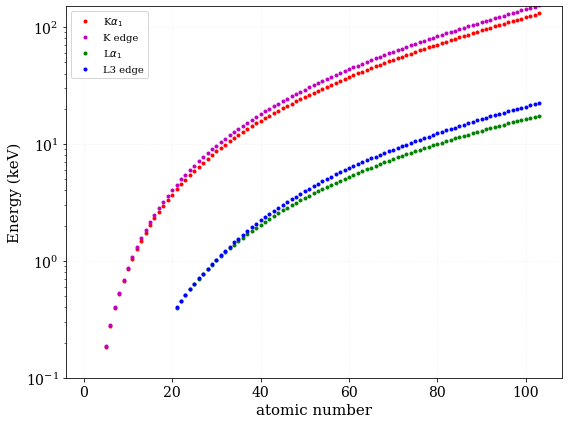

In [ ]:
amin=1; amax=104 # 104 is a mix value of atomic number @2022.8.7

# Ka1, Kedge
koutfname = "xraylib_Ka.csv" 
f = open(koutfname, 'w')
outstr = "Z,El,Kedge,Kalpha1\n"
f.write(outstr)
for i in range(amin,amax):
    atomicSymbol = xraylib.AtomicNumberToSymbol(i)    
    try:
        kedge = xraylib.EdgeEnergy(i, xraylib.K_SHELL) # see https://github.com/tschoonj/xraylib/wiki/Appendix-xraylib-macros#shell-macros
        ka1 = xraylib.LineEnergy(i, xraylib.KL3_LINE)  # Ka1, see https://github.com/tschoonj/xraylib/wiki/Appendix-xraylib-macros#siegbahn-x-ray-fluorescence-line-macros
    except:
        kedge = -1; ka1 = -1 # fill negative if NaN
#        print("warning ", i, atomicSymbol, sys.exc_info())                        
    outstr = str(i) + ","+str(atomicSymbol)+","+str(kedge)+","+str(ka1)+"\n"
    f.write(outstr)            
f.close()
kdata = pd.read_csv(koutfname)

# La1, L3edge
loutfname = "xraylib_La.csv" 
f = open(loutfname, 'w')
outstr = "Z,El,L3edge,Lalpha1\n"
f.write(outstr)
for i in range(amin,amax):
    atomicSymbol = xraylib.AtomicNumberToSymbol(i)    
    try:
        l3edge = xraylib.EdgeEnergy(i, xraylib.L3_SHELL) # see https://github.com/tschoonj/xraylib/wiki/Appendix-xraylib-macros#shell-macros
        la1 = xraylib.LineEnergy(i, xraylib.L3M5_LINE)  # Ka1, see https://github.com/tschoonj/xraylib/wiki/Appendix-xraylib-macros#siegbahn-x-ray-fluorescence-line-macros
    except:
        l3edge = -1; la1 = -1 # fill negative if NaN
#        print("warning ", i, atomicSymbol, sys.exc_info())                        
    outstr = str(i) + ","+str(atomicSymbol)+","+str(l3edge)+","+str(la1)+"\n"
    f.write(outstr)                        
f.close()
ldata = pd.read_csv(loutfname)

fig = plt.figure(figsize =(8, 6))
plt.plot(kdata['Z'], kdata['Kalpha1'],"r.",label=r'K$\alpha_1$')
plt.plot(kdata['Z'], kdata['Kedge'],"m.",label='K edge')
plt.plot(ldata['Z'], ldata['Lalpha1'],"g.",label=r'L$\alpha_1$')
plt.plot(ldata['Z'], ldata['L3edge'],"b.",label='L3 edge')
plt.grid(alpha=0.2, ls="dotted")
plt.yscale("log")
#plt.xscale("log")
#plt.xlim(emin,emax)
plt.ylim(0.1,150)
plt.ylabel(r"Energy (keV)")
plt.xlabel("atomic number")
plt.legend(loc="best")
plt.tight_layout()
plt.savefig(koutfname.replace(".csv",".png"))
plt.show()

## 蛍光X線発生率 (flourescence yields)

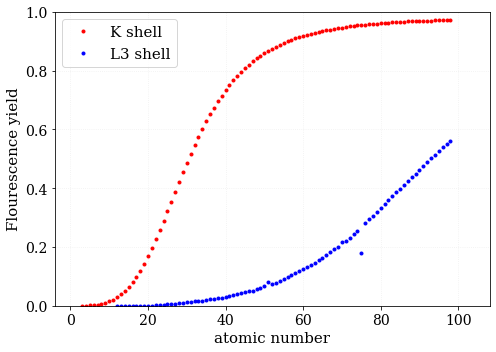

In [ ]:
# Flourescence yield 
amin=1; amax=104 # 104 is a mix value of atomic number @2022.8.7

# Ka1, Kedge
fyoutfname = "xraylib_fy.csv" 
f = open(fyoutfname, 'w')
outstr = "Z,El,Kfy,L3fy\n"
f.write(outstr)

for i in range(amin,amax):
    atomicSymbol = xraylib.AtomicNumberToSymbol(i)    
    try: # Kshell
        kfy = xraylib.FluorYield(i, xraylib.K_SHELL)
    except:
        kfy = -1
#        print("warning ", i, atomicSymbol, sys.exc_info())                        
    try: # L3 shell
        l3fy = xraylib.FluorYield(i, xraylib.L3_SHELL)
    except:
        l3fy = -1 # fill negative if NaN
#        print("warning ", i, atomicSymbol, sys.exc_info())                        
                
    outstr = str(i) + ","+str(atomicSymbol)+","+str(kfy)+","+str(l3fy)+"\n"
    f.write(outstr)            
f.close()
fydata = pd.read_csv(fyoutfname)

fig = plt.figure(figsize =(7, 5))
plt.plot(fydata['Z'], fydata['Kfy'],"r.",label='K shell')
plt.plot(fydata['Z'], fydata['L3fy'],"b.",label='L3 shell')

plt.grid(alpha=0.2, ls="dotted")
plt.ylim(0,1)
plt.ylabel(r"Flourescence yield")
plt.xlabel("atomic number")
plt.legend(loc="best",fontsize=15)
plt.tight_layout()
plt.savefig(outfname.replace(".csv",".png"))
plt.show()

## 蛍光X線の強度比

In [ ]:
lines = ["KL2","KL3","KM2","KM3","L1L2","L1L3","L1M1","L1M2","L1M3","L1M4","L1M5","L1N1","L2L3","L2M1","L2M2","L2M3","L2M4","L2M5","L2N1","L3M1","L3M2","L3M3","L3M4","L3M5","L3N1"]
rates = []
L3_lines = [s for s in lines if s.startswith('L3')] # setect only lines from "L3"
for line in L3_lines:
    ls = "xraylib." + str(line) + "_LINE"    
    rates.append(xraylib.RadRate(26, eval(ls))) # assume Fe
print(L3_lines)    
print(rates)    
print(np.sum(rates))

['L3M1', 'L3M2', 'L3M3', 'L3M4', 'L3M5', 'L3N1']
[0.095533, 8.5144e-05, 8.261e-05, 0.090617, 0.80735, 0.0063351]
1.000002854


## 蛍光X線生成断面積 (flourescence cross section)

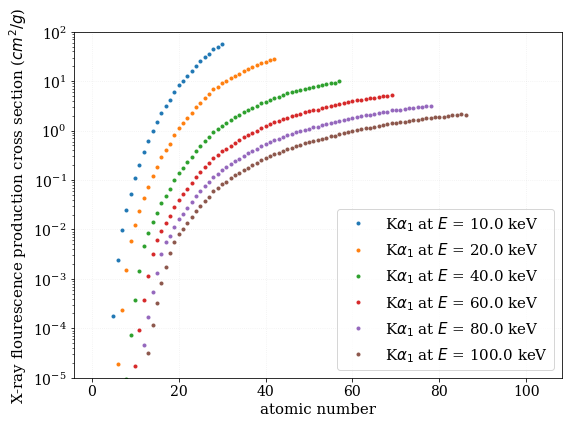

In [ ]:
# Flourescence yield 
amin=1; amax=104 # 104 is a mix value of atomic number @2022.8.7
inenergies = [10.0, 20.0,40.0,60.0,80.0,100.0] # keV 

fig = plt.figure(figsize =(8, 6))

for inenergy in inenergies:
    # Ka1, Kedge
    cskoutfname = "xraylib_csk"+str(inenergy)+"keV.csv" 
    f = open(cskoutfname, 'w')
    outstr = "Z,El,csk\n"
    f.write(outstr)
    for i in range(amin,amax):
        atomicSymbol = xraylib.AtomicNumberToSymbol(i)    
        try: # Kshell
            csk = xraylib.CS_FluorLine_Kissel_Cascade(i, xraylib.KL3_LINE, inenergy) # Ka1            
        except:
            csk = -1
#            print("warning ", i, atomicSymbol, sys.exc_info())                        

        outstr = str(i) + ","+str(atomicSymbol)+","+str(csk)+"\n"
        f.write(outstr)            

    f.close()

    cskdata = pd.read_csv(cskoutfname)
    plt.plot(cskdata['Z'], cskdata['csk'],".",label=r'K$\alpha_1$ at $E$ = ' + str(inenergy) + " keV")

    plt.grid(alpha=0.2, ls="dotted")
    #plt.xlim(0,inenergy)
    plt.yscale("log")
    plt.ylim(1e-5,1e2)
    plt.ylabel(r"X-ray flourescence production cross section ($cm^2/g$)")
    plt.xlabel("atomic number")
    plt.legend(loc="best",fontsize=15)
    plt.tight_layout()
plt.savefig(outfname.replace(".csv",".png"))
plt.show()

## X線の透過率の計算

thickness =  1.0  [um]
C density =  2.0  g/cm^3


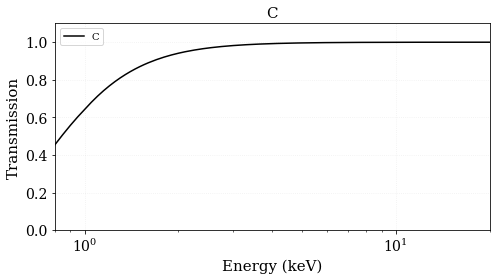

thickness =  1.0  [um]
Al density =  2.6989  g/cm^3


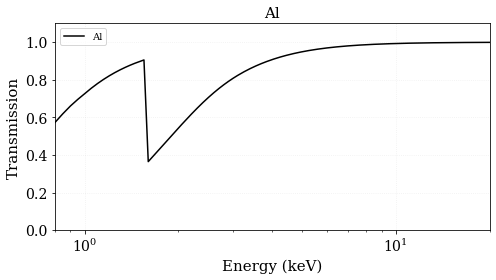

In [ ]:
# trans
# convert data into csv file, and open it with pandas
el_list=["C","Al"] # element name list
thickness_list = [0.0001,0.0001]     # cm 
for el,thickness in zip(el_list,thickness_list):
    emin=0.8 # keV
    emax=20.0 # keV
    de=0.05; # keV
    outfname = "xraylib_filt_" + el + ".csv"; f = open(outfname, 'w')
    outstr = "ene,trans,abs\n"
    f.write(outstr)
    an = xraylib.SymbolToAtomicNumber(el)
    density = xraylib.ElementDensity(an) # g/cm^3
    print("thickness = ", thickness * 10 * 1e3, " [um]")
    print(el, "density = ", density, " g/cm^3")
    for ene in np.arange(emin,emax,de):
        cs_total = xraylib.CS_Total(an, ene)
        trans = np.exp(-1.0 * cs_total * thickness * density)        
        abs =  1.0 - trans
        outstr = str(ene) + ","+str(trans)+","+str(abs)+"\n"
        f.write(outstr)
    f.close()
    trdata = pd.read_csv(outfname)

    fig = plt.figure(figsize =(7, 4))
    plt.title(el)
    plt.plot(trdata['ene'], trdata['trans'],"k-",label=el)
    plt.grid(alpha=0.2, ls="dotted")
#    plt.yscale("log")
    plt.xscale("log")
    plt.xlim(emin,emax)
    plt.ylim(0,1.1)
    plt.ylabel(r"Transmission")
    plt.xlabel("Energy (keV)")
    plt.legend(loc="best")
    plt.tight_layout()
    plt.savefig(outfname.replace(".csv",".png"))
    plt.show()

## X線の吸収率の計算

thickness =  4.0  [um]
Au density =  19.32  g/cm^3


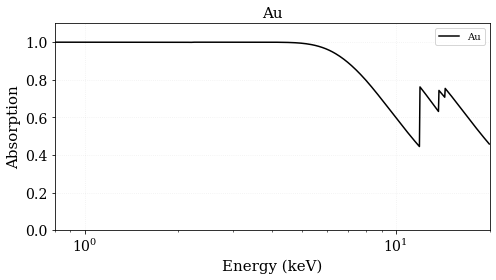

thickness =  4.0  [um]
Bi density =  9.747  g/cm^3


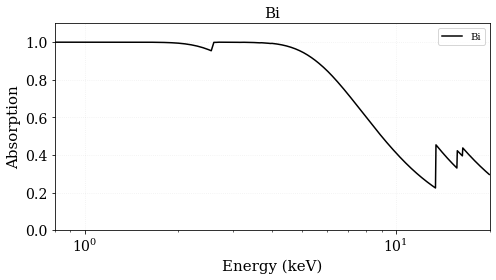

In [ ]:
# absorption 
# convert data into csv file, and open it with pandas
el_list=["Au","Bi"] # element name list
thickness_list = [0.0004,0.0004]     # cm 
for el,thickness in zip(el_list,thickness_list):
    emin=0.8 # keV
    emax=20.0 # keV
    de=0.05; # keV
    outfname = "xraylib_filt_" + el + ".csv"; f = open(outfname, 'w')
    outstr = "ene,trans,abs\n"
    f.write(outstr)
    an = xraylib.SymbolToAtomicNumber(el)
    density = xraylib.ElementDensity(an) # g/cm^3
    print("thickness = ", thickness * 10 * 1e3, " [um]")
    print(el, "density = ", density, " g/cm^3")
    for ene in np.arange(emin,emax,de):
        cs_total = xraylib.CS_Total(an, ene)
        trans = np.exp(-1.0 * cs_total * thickness * density)        
        abs =  1.0 - trans
        outstr = str(ene) + ","+str(trans)+","+str(abs)+"\n"
        f.write(outstr)
    f.close()
    trdata = pd.read_csv(outfname)

    fig = plt.figure(figsize =(7, 4))
    plt.title(el)
    plt.plot(trdata['ene'], trdata['abs'],"k-",label=el)
    plt.grid(alpha=0.2, ls="dotted")
#    plt.yscale("log")
    plt.xscale("log")
    plt.xlim(emin,emax)
    plt.ylim(0,1.1)
    plt.ylabel(r"Absorption")
    plt.xlabel("Energy (keV)")
    plt.legend(loc="best")
    plt.tight_layout()
    plt.savefig(outfname.replace(".csv",".png"))
    plt.show()

## クライン＝仁科の公式

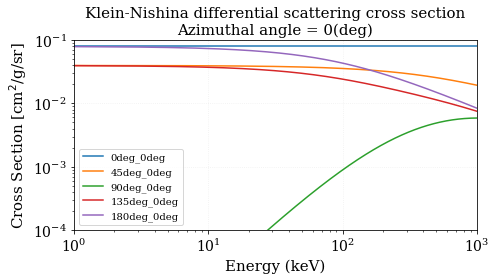

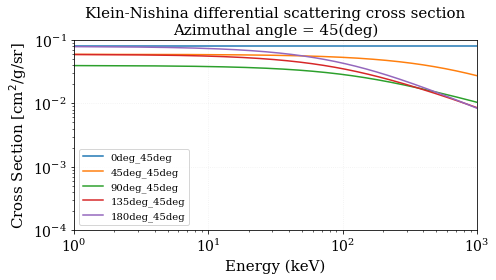

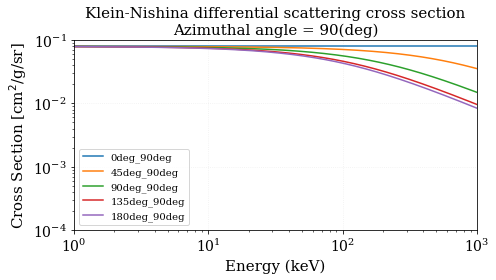

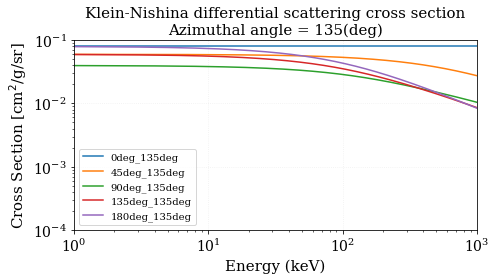

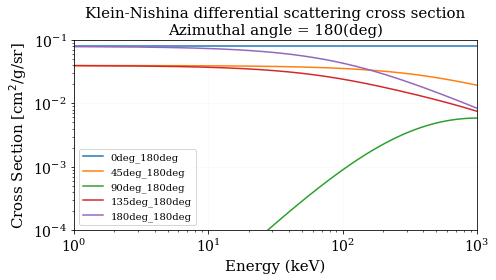

In [ ]:
import math
scattering_angle_list = [0, 45, 90, 135, 180] # deg
azimuthal_angle_list = [0, 45, 90, 135, 180] # deg

for azimuthal_angle in azimuthal_angle_list:
  fig = plt.figure(figsize =(7, 4))
  emin=1 # keV
  emax=1000.0 # keV
  de=1; # keV
  plt.title("Klein-Nishina differential scattering cross section\n" + "Azimuthal angle = " +str(azimuthal_angle)+ "(deg)")

  for scattering_angle in scattering_angle_list:
    tag=str(scattering_angle) + "deg_" + str(azimuthal_angle) + "deg"
    outfname = "xraylib_KN_" + tag + ".csv"; f = open(outfname, 'w')
    outstr = "ene,cs\n"
    f.write(outstr)

    for ene in np.arange(emin,emax,de):
        cs = xraylib.DCSP_KN(ene, math.radians(scattering_angle), math.radians(azimuthal_angle))
        outstr = str(ene) + "," + str(cs) + "\n"
        f.write(outstr)
    f.close()    
    data = pd.read_csv(outfname)

    plt.plot(data['ene'], data['cs'],"-",label=tag)
    plt.grid(alpha=0.2, ls="dotted")
    plt.yscale("log")
    plt.xscale("log")
    plt.ylim(1e-4,1e-1)
    plt.xlim(emin,emax)
    plt.ylabel(r"Cross Section [cm$^2$/g/sr]")
    plt.xlabel("Energy (keV)")
    plt.legend(loc="best")
    plt.tight_layout()

  plt.savefig(outfname.replace(".csv",".png"))
  plt.show()

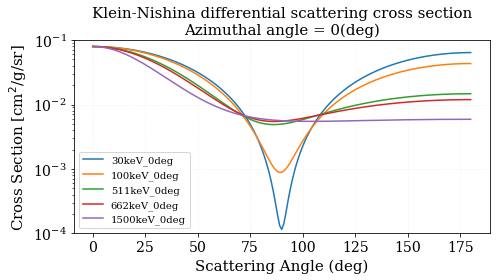

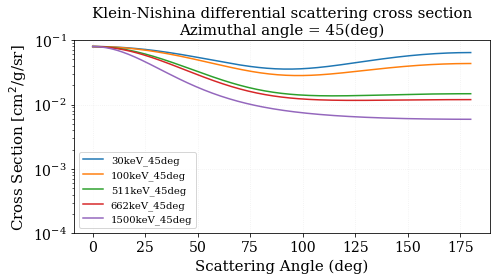

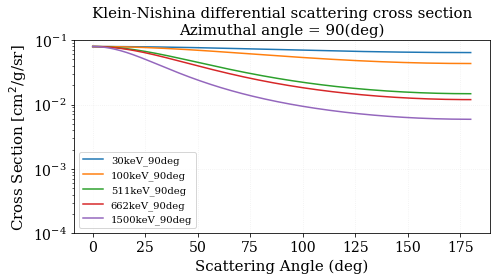

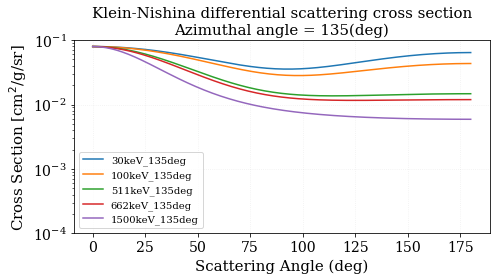

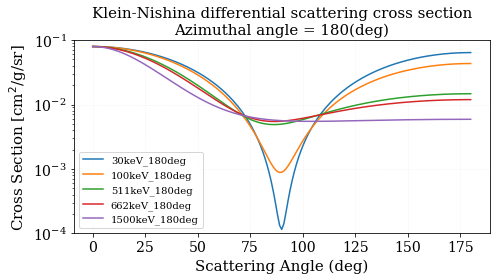

In [ ]:
import math
ene_list = [30, 100, 511, 662,1500] # keV
#scattering_angle_list = [0, 45, 90, 135, 180] # deg
azimuthal_angle_list = [0, 45, 90, 135, 180] # deg

for azimuthal_angle in azimuthal_angle_list:
  fig = plt.figure(figsize =(7, 4))

  plt.title("Klein-Nishina differential scattering cross section\n" + "Azimuthal angle = " +str(azimuthal_angle) + "(deg)")

  for ene in ene_list:
    tag=str(ene) + "keV_" + str(azimuthal_angle) + "deg"
    outfname = "xraylib_KN_" + tag + ".csv"; f = open(outfname, 'w')
    outstr = "scattering_angle,cs\n"
    f.write(outstr)

    for scattering_angle in np.arange(0,181,1):
        cs = xraylib.DCSP_KN(ene, math.radians(scattering_angle), math.radians(azimuthal_angle))
        outstr = str(scattering_angle) + "," + str(cs) + "\n"
        f.write(outstr)
    f.close()    
    data = pd.read_csv(outfname)

    plt.plot(data['scattering_angle'], data['cs'],"-",label=tag)
    plt.grid(alpha=0.2, ls="dotted")
    plt.yscale("log")
    plt.xscale("linear")
    plt.ylim(1e-4,1e-1)

    plt.ylabel(r"Cross Section [cm$^2$/g/sr]")
    plt.xlabel("Scattering Angle (deg)")
    plt.legend(loc="best")
    plt.tight_layout()

  plt.savefig(outfname.replace(".csv",".png"))
  plt.show()